In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fc = pd.read_csv('/content/Fraud_check.csv')

In [3]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fc.columns



Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
fc = fc.rename({'Undergrad':'undergrad', 'Marital.Status':'maritalstatus', 'Taxable.Income':'taxableincome',
                    'City.Population':'citypopulation', 'Work.Experience':'workexperience', 'Urban':'urban'}, axis = 1)

In [7]:
fc.head()

,undergrad,maritalstatus,taxableincome,citypopulation,workexperience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
fc.describe()

,taxableincome,citypopulation,workexperience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


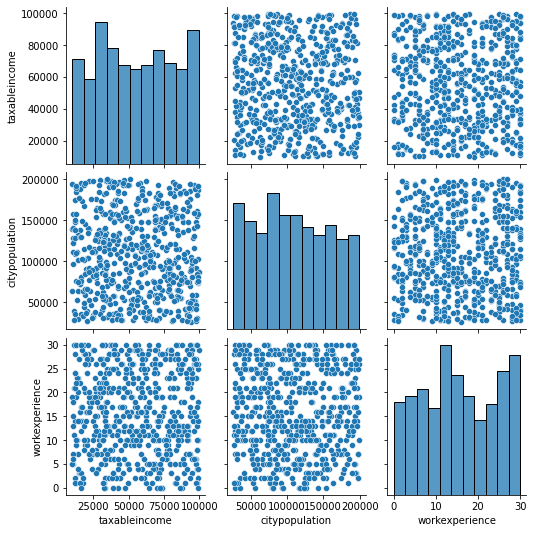

In [9]:
import seaborn as sns
sns.pairplot(fc)

for categories

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


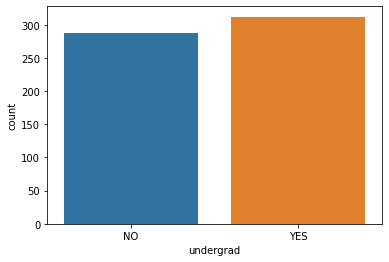

In [10]:
sns.countplot(fc['undergrad'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


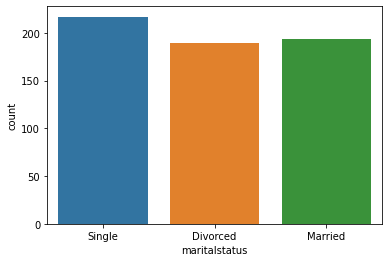

In [11]:
sns.countplot(fc['maritalstatus'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


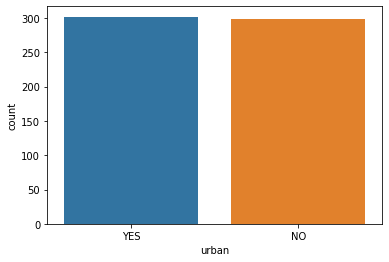

In [12]:
sns.countplot(fc['urban'])
plt.show()

for numerical data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


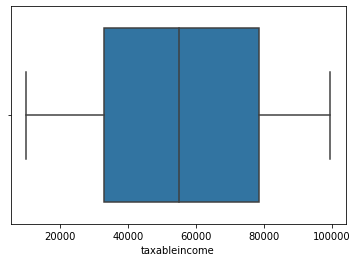

In [13]:
sns.boxplot(fc['taxableincome'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


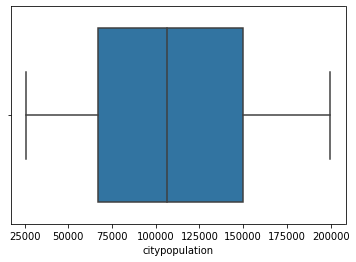

In [14]:
sns.boxplot(fc['citypopulation'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


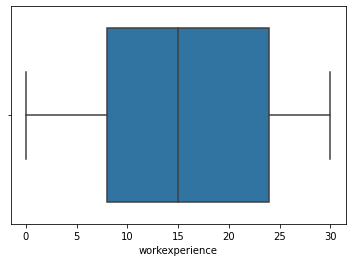

In [15]:
sns.boxplot(fc['workexperience'])
plt.show()

In [16]:
corr = fc.corr()

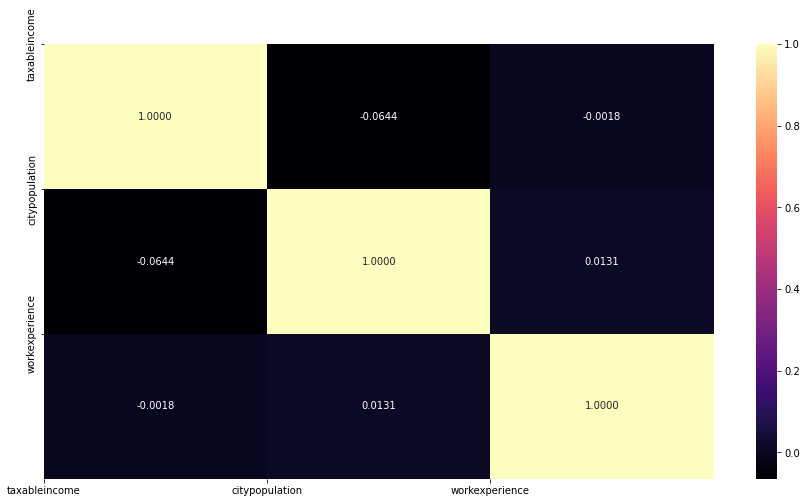

In [17]:
from typing import ChainMap
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".4f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [18]:
fc['taxablecategory'] = pd.cut(x = fc['taxableincome'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
fc

,undergrad,maritalstatus,taxableincome,citypopulation,workexperience,urban,taxablecategory
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxablecategory', ylabel='count'>

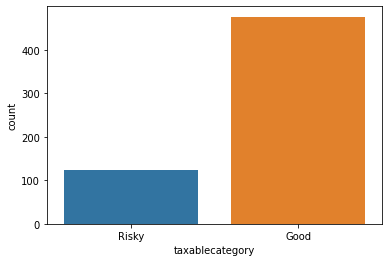

In [19]:
sns.countplot(fc['taxablecategory'])



In [20]:
fc['taxablecategory'].value_counts()

Good     476
Risky    124
Name: taxablecategory, dtype: int64

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fc['undergrad'] = label_encoder.fit_transform(fc['undergrad'])
fc['maritalstatus'] = label_encoder.fit_transform(fc['maritalstatus'])
fc['urban'] = label_encoder.fit_transform(fc['urban'])
fc['taxablecategory'] = label_encoder.fit_transform(fc['taxablecategory'])

In [22]:
fc.head()

,undergrad,maritalstatus,taxableincome,citypopulation,workexperience,urban,taxablecategory
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [23]:
fc1 = fc.drop('taxableincome', axis = 1)
fc1

,undergrad,maritalstatus,citypopulation,workexperience,urban,taxablecategory
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [24]:
corr = fc1.corr()

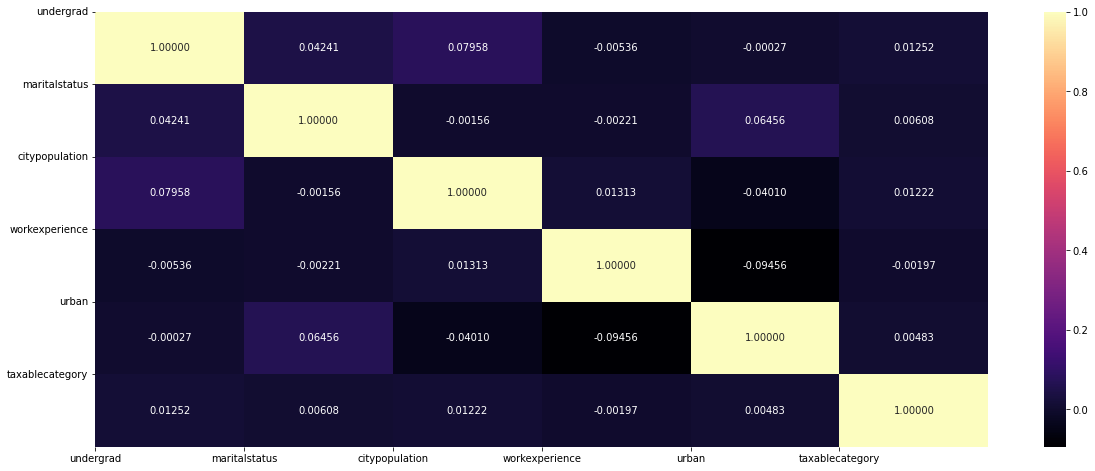

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".5f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [26]:
X = fc1.drop('taxablecategory', axis = 1)
y = fc1['taxablecategory']

In [27]:
X

,undergrad,maritalstatus,citypopulation,workexperience,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxablecategory, Length: 600, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.42, random_state= 32)

In [30]:
x_train

,undergrad,maritalstatus,citypopulation,workexperience,urban
530,1,0,194421,17,1
323,1,1,165175,13,0
529,0,0,83388,14,0
542,1,1,199778,27,0
89,1,1,176050,20,0
...,...,...,...,...,...
252,0,2,40855,28,1
403,0,0,130912,27,1
88,0,1,63896,24,1
310,1,0,189435,22,1


In [31]:
y_train

530    0
323    0
529    0
542    0
89     1
      ..
252    0
403    0
88     0
310    0
555    0
Name: taxablecategory, Length: 348, dtype: int64

In [32]:
x_test

,undergrad,maritalstatus,citypopulation,workexperience,urban
312,1,2,31641,18,0
174,1,2,149857,8,0
51,1,2,174042,30,0
186,0,1,166976,19,1
223,1,1,192297,17,1
...,...,...,...,...,...
95,1,2,121498,28,1
346,0,2,134635,30,1
437,1,1,117250,20,1
408,1,0,77059,22,0


In [33]:
y_test

312    0
174    0
51     0
186    0
223    0
      ..
95     0
346    1
437    1
408    0
567    1
Name: taxablecategory, Length: 252, dtype: int64

In [34]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

C5 MODEL

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.5416666666666666, 0.9166666666666666, 'X[3] <= 23.5\nentropy = 0.752\nsamples = 348\nvalue = [273, 75]'),
 Text(0.3, 0.75, 'X[2] <= 197925.0\nentropy = 0.797\nsamples = 261\nvalue = [198, 63]'),
 Text(0.26666666666666666, 0.5833333333333334, 'X[2] <= 75315.0\nentropy = 0.792\nsamples = 260\nvalue = [198, 62]'),
 Text(0.13333333333333333, 0.4166666666666667, 'X[2] <= 45834.0\nentropy = 0.682\nsamples = 83\nvalue = [68, 15]'),
 Text(0.06666666666666667, 0.25, 'X[4] <= 0.5\nentropy = 0.885\nsamples = 33\nvalue = [23, 10]'),
 Text(0.03333333333333333, 0.08333333333333333, 'entropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.485\nsamples = 19\nvalue = [17, 2]'),
 Text(0.2, 0.25, 'X[1] <= 0.5\nentropy = 0.469\nsamples = 50\nvalue = [45, 5]'),
 Text(0.16666666666666666, 0.08333333333333333, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.23333333333333334, 0.08333333333333333, 'entropy = 0.581\nsamples = 36\nvalue = [31, 5]'),
 Text(0

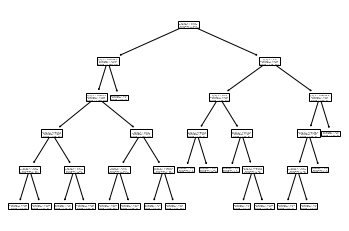

In [36]:
tree.plot_tree(model)

In [37]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

0    234
1     18
dtype: int64

In [38]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

In [40]:
cm

array([[187,  16],
       [ 47,   2]])

In [41]:
model.score(x_test, y_test)

0.75

The model is 75% accurate for c5 algorithm

CART ALGORITHM

[Text(0.5416666666666666, 0.9166666666666666, 'X[3] <= 23.5\ngini = 0.338\nsamples = 348\nvalue = [273, 75]'),
 Text(0.3, 0.75, 'X[2] <= 197925.0\ngini = 0.366\nsamples = 261\nvalue = [198, 63]'),
 Text(0.26666666666666666, 0.5833333333333334, 'X[3] <= 16.5\ngini = 0.363\nsamples = 260\nvalue = [198, 62]'),
 Text(0.13333333333333333, 0.4166666666666667, 'X[2] <= 193629.5\ngini = 0.337\nsamples = 191\nvalue = [150, 41]'),
 Text(0.06666666666666667, 0.25, 'X[2] <= 184522.5\ngini = 0.326\nsamples = 185\nvalue = [147, 38]'),
 Text(0.03333333333333333, 0.08333333333333333, 'gini = 0.337\nsamples = 177\nvalue = [139, 38]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2, 0.25, 'X[2] <= 196221.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23333333333333334, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.4166666666666667, 'X

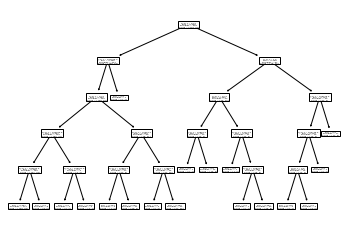

In [42]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth= 5)
model1.fit(x_train, y_train)
tree.plot_tree(model1)

[Text(0.5416666666666666, 0.9166666666666666, 'workexperience <= 23.5\ngini = 0.338\nsamples = 348\nvalue = [273, 75]\nclass = Risky'),
 Text(0.3, 0.75, 'citypopulation <= 197925.0\ngini = 0.366\nsamples = 261\nvalue = [198, 63]\nclass = Risky'),
 Text(0.26666666666666666, 0.5833333333333334, 'workexperience <= 16.5\ngini = 0.363\nsamples = 260\nvalue = [198, 62]\nclass = Risky'),
 Text(0.13333333333333333, 0.4166666666666667, 'citypopulation <= 193629.5\ngini = 0.337\nsamples = 191\nvalue = [150, 41]\nclass = Risky'),
 Text(0.06666666666666667, 0.25, 'citypopulation <= 184522.5\ngini = 0.326\nsamples = 185\nvalue = [147, 38]\nclass = Risky'),
 Text(0.03333333333333333, 0.08333333333333333, 'gini = 0.337\nsamples = 177\nvalue = [139, 38]\nclass = Risky'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Risky'),
 Text(0.2, 0.25, 'citypopulation <= 196221.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = Risky'),
 Text(0.16666666666666666, 0.0833333333

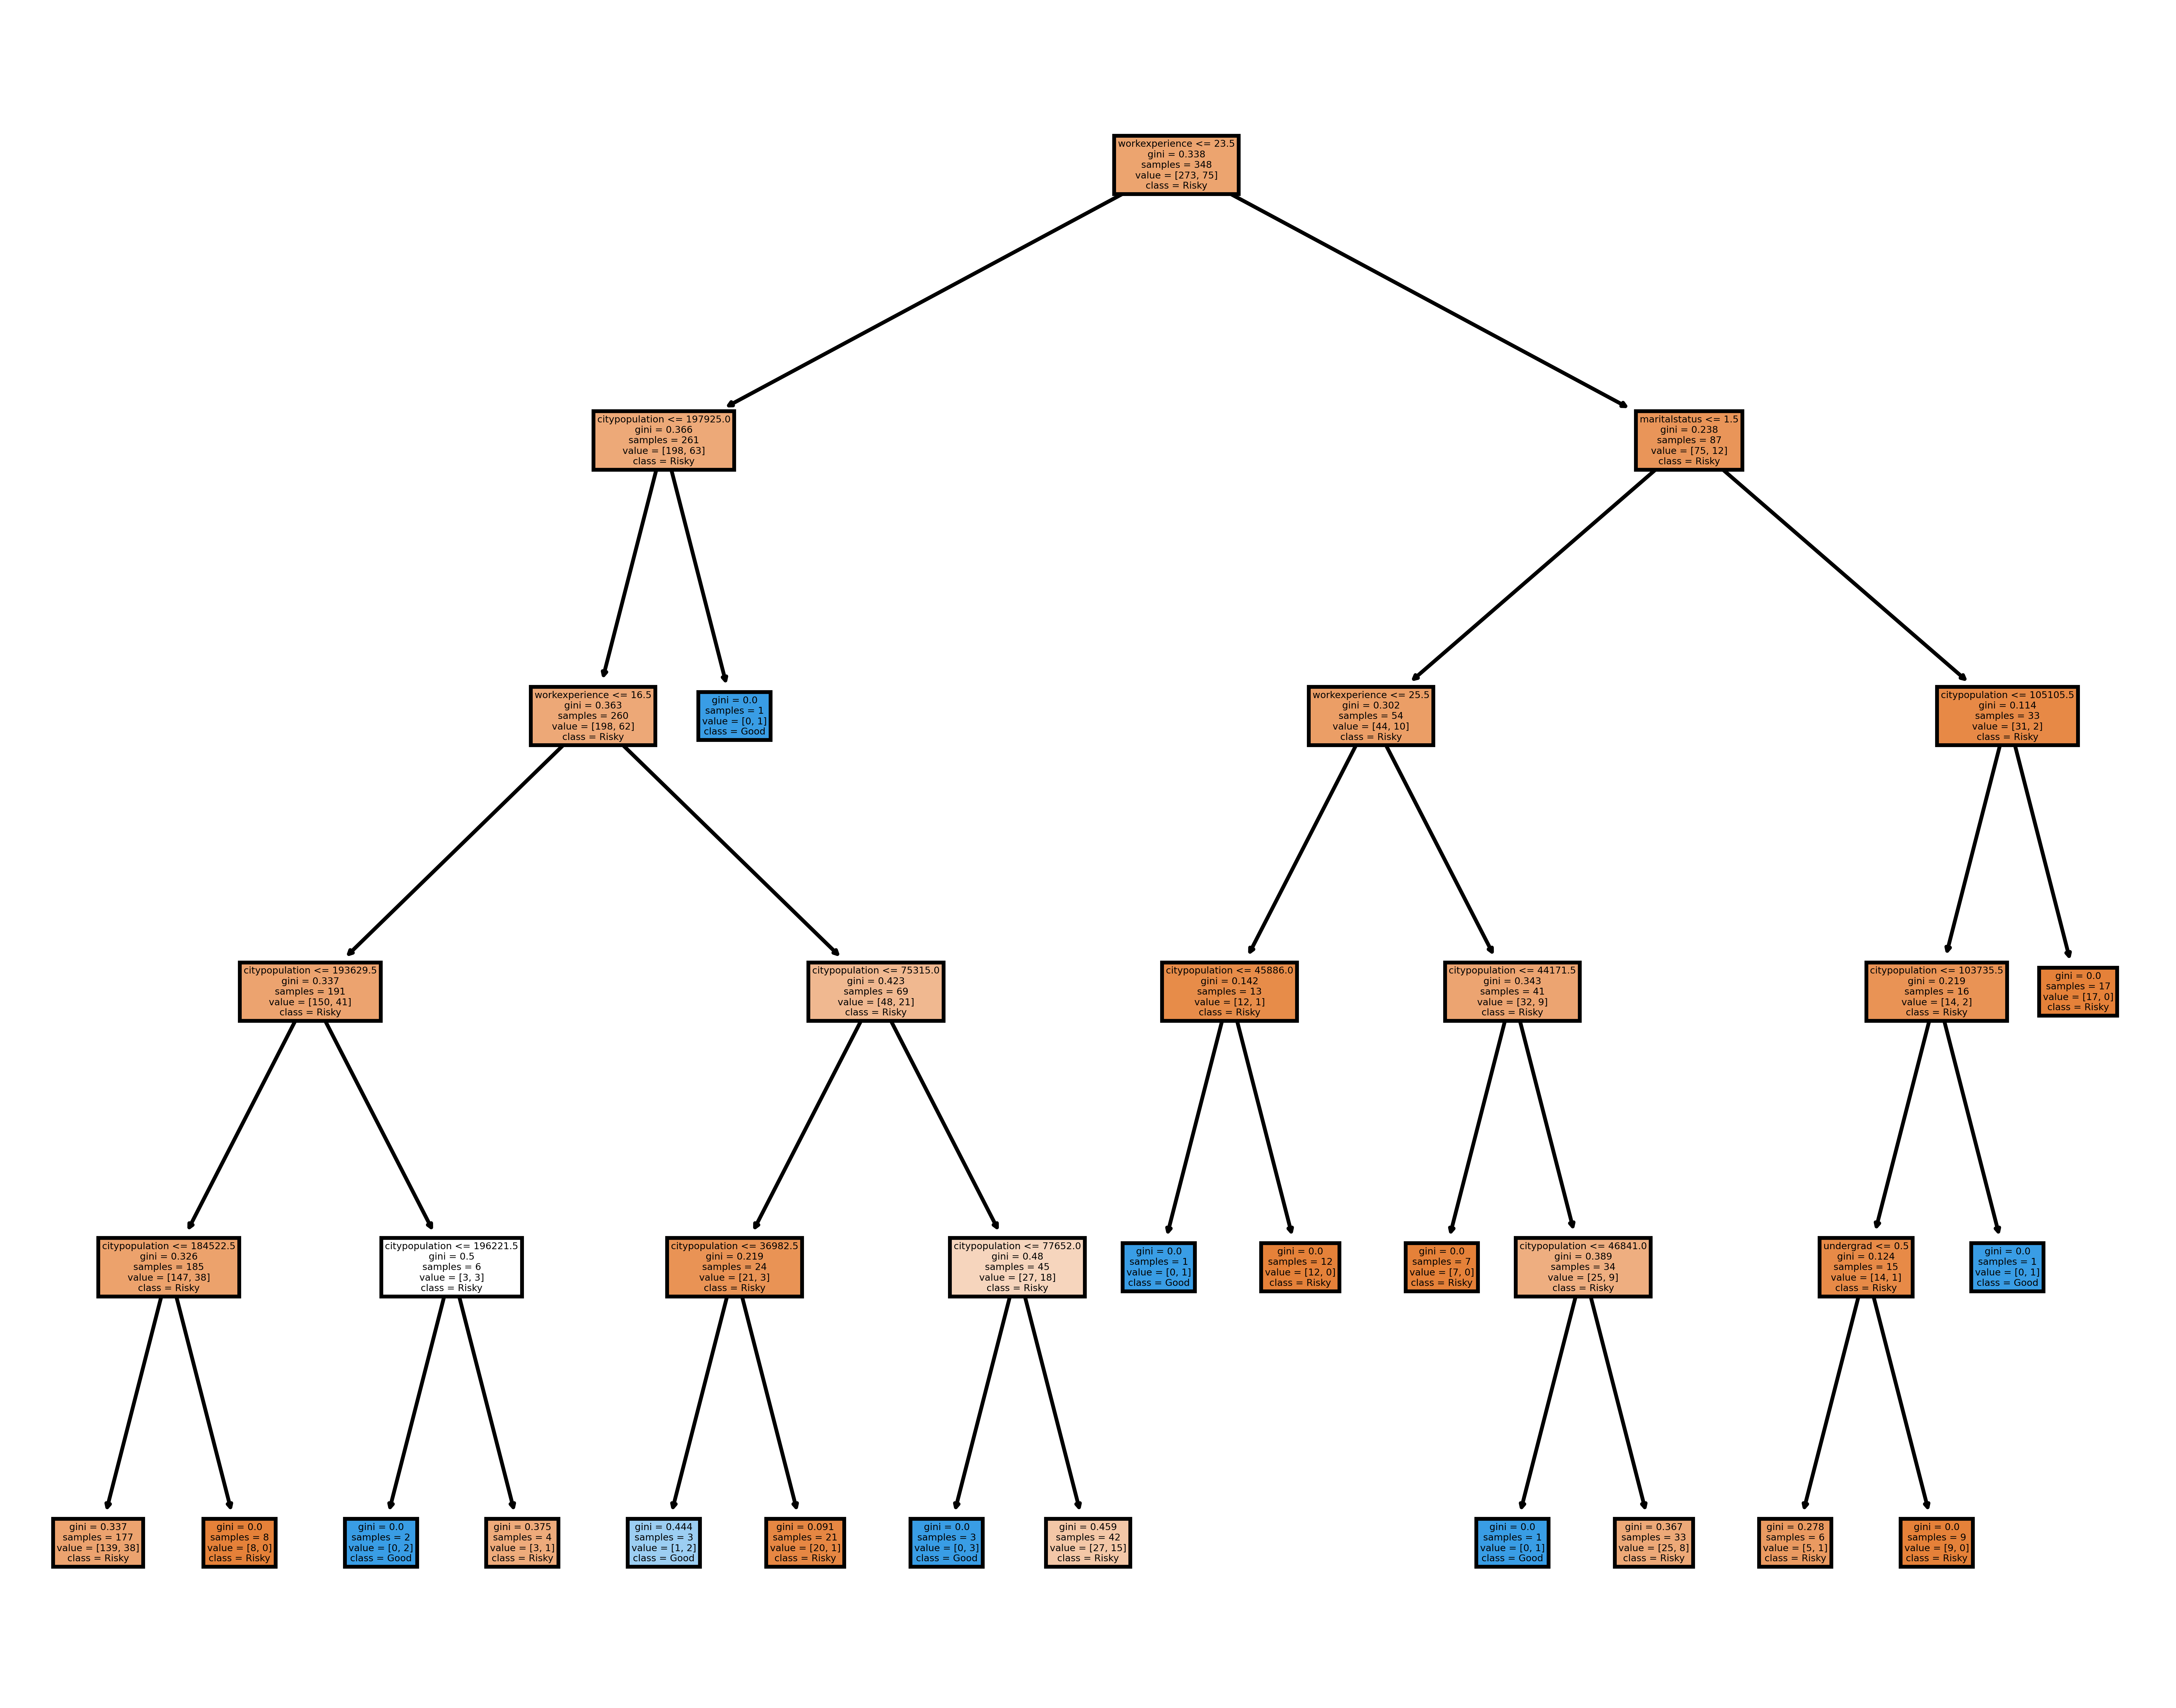

In [43]:
fn=['undergrad', 'maritalstatus', 'citypopulation', 'workexperience','urban', 'taxablecategory']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=1000) 
tree.plot_tree(model1, feature_names = fn, class_names=cn, filled = True)

In [44]:
preds = model1.predict(x_test)
pd.Series(preds).value_counts()

0    241
1     11
dtype: int64

In [45]:


preds



array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [46]:
cm2 = confusion_matrix(y_test, preds)

In [47]:
cm2

array([[195,   8],
       [ 46,   3]])

In [48]:
model1.score(x_test, y_test)

0.7857142857142857

model is 78% accurate for CART algorithm